> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__

# Homework

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Problems [Part 1](./01_Cheers_Stats_Beers.md)

1. Gordon Moore created an empirical prediction that the rate of
semiconductors on a computer chip would double every two years. This
prediction was known as Moore's law. Gordon Moore had originally only
expected this empirical relation to hold from 1965 - 1975
[[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],
but semiconductor manufacturers were able to keep up with Moore's law
until 2015. 

In the folder "../data" is a comma separated value (CSV) file,
"transistor_data.csv" [taken from wikipedia
01/2020](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors).

a. Use the `!head ../data/transistor_data.csv` command to look at
the top of the csv. What are the headings for the columns?

b. Load the csv into a pandas dataframe. How many missing values
(`NaN`) are
in the column with the number of transistors? What fraction are
missing?

In [3]:
# A
!head '../data/transistor_data.csv'

Processor,MOS transistor count,Date of Introduction,Designer,MOSprocess,Area
"MP944 (20-bit, 6-chip)",NaN,1970,Garrett AiResearch,?,?
"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,"10,000 nm",12 mm²
"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,"10,000 nm",14 mm²
"NEC μCOM-4 (4-bit, 42-pin)",2500,1973,NEC,"7,500 nm",?
"Intel 4040 (4-bit, 16-pin)",3000,1974,Intel,"10,000 nm",12 mm²
"Motorola 6800 (8-bit, 40-pin)",4100,1974,Motorola,"6,000 nm",16 mm²
"Intel 8080 (8-bit, 40-pin)",6000,1974,Intel,"6,000 nm",20 mm²
"TMS 1000 (4-bit, 28-pin)",8000,1974,Texas Instruments,"8,000 nm",11 mm²
"MOS Technology 6502 (8-bit, 40-pin)",4528,1975,MOS Technology,"8,000 nm",21 mm²


The column headers are Processor, MOS transistor count, Date of Introduction, Designer, MOSprocess, and Area

In [4]:
# B
transistor = pd.read_csv('../data/transistor_data.csv')

numb_trans = transistor['MOS transistor count']

trans_len=[0 ,0]
trans_len[0] = len(numb_trans)
trans_len[1] = len(numb_trans.dropna())

num_na = trans_len[0]-trans_len[1]



print('There are {:1.0f} NaN values.' .format(num_na))
print('{:2.0f}/{:3.0f} are missing values' .format(num_na,trans_len[0]))

There are 7 NaN values.
 7/186 are missing values


## Problems [Part 2](./02_Seeing_Stats.md)

1. Many beers do not report the IBU of the beer because it is very
small. You may be accidentally removing whole categories of beer from
our dataset by removing rows that do not include the IBU measure. 

    a. Use the command `beers_filled = beers.fillna(0)` to clean the `beers` dataframe
    
    b. Repeat the steps above to recreate the plot "Beer ABV vs. IBU mean values by style" 
    scatter plot with `beers_filled`. What differences do you notice between the plots?

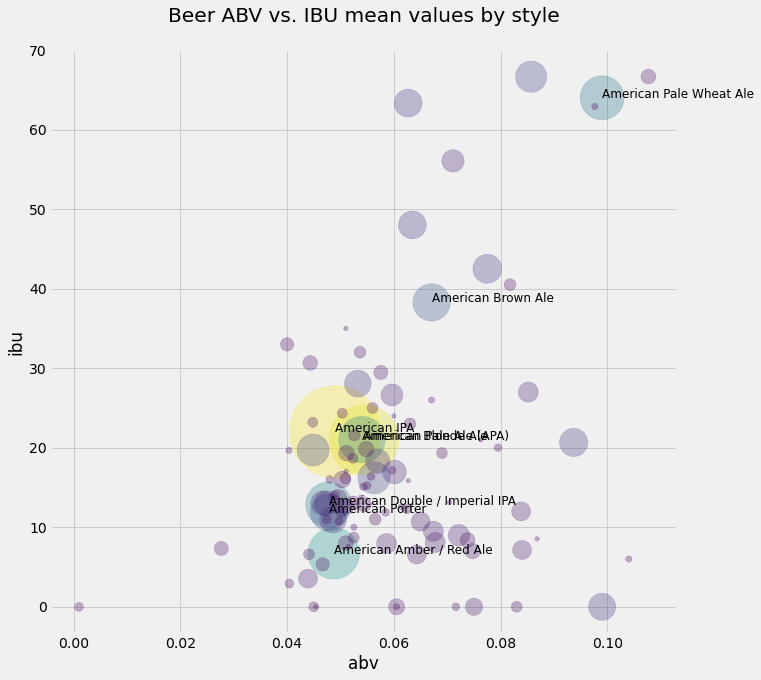

In [5]:
# 1 a 
beers = pd.read_csv('../data/beers.csv')

beers_filled = beers.fillna(0)

# 1 b
from matplotlib import cm
style_series = beers['style']
style_counts = style_series.value_counts()
colors = cm.viridis(style_counts.values)

beers_clean=beers_filled

beers_styles = beers_clean.drop(['Unnamed: 0','name','brewery_id','ounces','id'], axis=1)
style_means = beers_styles.groupby('style').mean()
style_counts = beers_styles['style'].value_counts()

ax = style_means.plot.scatter(figsize=(10,10), 
                               x='abv', y='ibu', s=style_counts*20, color=colors,
                               title='Beer ABV vs. IBU mean values by style\n',
                               alpha=0.3);

for i, txt in enumerate(list(style_counts.index.values)):
       if style_counts.values[i] > 65:
        ax.annotate(txt, (style_means.abv.iloc[i],style_means.ibu.iloc[i]), fontsize=12)

This plot differs from the on in the exampe by showing the popular beers are all centered around 0.05 abv and 10-20 ibu.

2. Gordon Moore created an empirical prediction that the rate of
semiconductors on a computer chip would double every two years. This
prediction was known as Moore's law. Gordon Moore had originally only
expected this empirical relation to hold from 1965 - 1975
[[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],
but semiconductor manufacturers were able to keep up with Moore's law
until 2015. 

    In the folder "../data" is a comma separated value (CSV) file, "transistor_data.csv" [taken from wikipedia 01/2020](https://en.wikipedia.org/wiki/Transistor_count#Microprocessors). 
    Load the csv into a pandas dataframe, it has the following headings:

    |Processor| MOS transistor count| Date of Introduction|Designer|MOSprocess|Area|
    |---|---|---|---|---|---|

    a. In the years 2017, what was the average MOS transistor count? 
    Make a boxplot of the transistor count in 2017 and find the first, second and third quartiles.

    b. Create a semilog y-axis scatter plot (i.e. `plt.semilogy`) for the 
    "Date of Introduction" vs "MOS transistor count". 
    Color the data according to the "Designer".

In [ ]:
# 2 a

year= 2017

trans_17 = transistor[transistor['Date of Introduction']==year]

trans_ct17= trans_17['MOS transistor count']

transcount_17 = np.mean(trans_17['MOS transistor count'])

print('The average transistor count in {:4.0f} is {:1.0e} transistors' .format(year, transcount_17))

plt.boxplot(trans_ct17, labels=['MOS transistor count 2017']);

trans_q1 = np.percentile(trans_ct17, q=25)
trans_q2 = np.percentile(trans_ct17, q=50)
trans_q3 = np.percentile(trans_ct17, q=75)

print('The first quartile is {:1.0e}' .format(trans_q1))
print('The second quartile is {:1.0e}' .format(trans_q2))
print('The third quartile is {:1.0e}' .format(trans_q3))

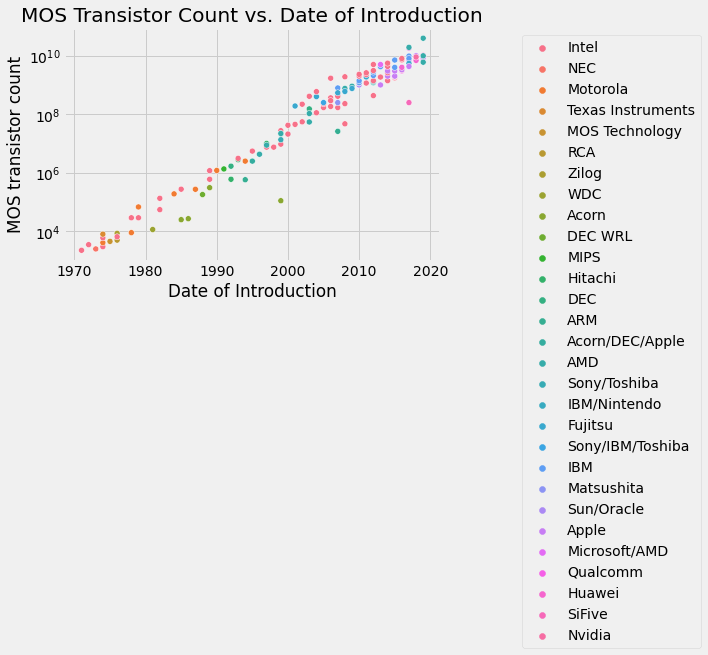

In [7]:
# 2 b Create a semilog y-axis scatter plot (i.e. plt.semilogy) for the "Date of Introduction" 
# vs "MOS transistor count". Color the data according to the "Designer"

# plt.semilogy(transistor['Date of Introduction'], transistor['MOS transistor count'], 'o')
# plt.xlabel('Year')
# plt.ylabel('MOS Transistor Count')
# 

import seaborn as sns

transistor = transistor.dropna()

t = sns.scatterplot(data = transistor , x='Date of Introduction', y= 'MOS transistor count' , hue='Designer')
t.set(yscale='log')
plt.legend(bbox_to_anchor=(1.2, 1),loc='best' )
plt.title('MOS Transistor Count vs. Date of Introduction');

## Problems [Part 3](03_Linear_Regression_with_Real_Data.md)

1. There is a csv file in '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
Compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

In [8]:
percnet = 2.25

    a. Plot the total energy consumption of the United States and Europe
    
    b. Use a linear least-squares regression to find a function for the energy consumption as a function of year
    
    energy consumed = $f(t) = At+B$
    
    c. At what year would you change split the data and use two lines like you did in the 
    land temperature anomoly? Split the data and perform two linear fits. 
    
    d. What is your prediction for US energy use in 2025? How about European energy use in 2025?

In [9]:
energy = pd.read_csv('../data/primary-energy-consumption-by-region.csv')

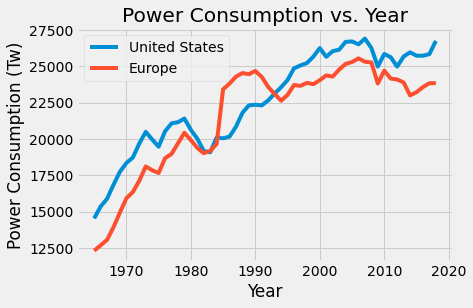

In [10]:
# 3.1.a Plot the total energy consumption of the United States and Europe
freedom_energy = energy[energy['Entity']=='United States']
euro_energy = energy[energy['Entity']=='Europe']

plt.plot(freedom_energy['Year'], freedom_energy['Primary Energy Consumption (terawatt-hours)'], label='United States')
plt.plot(euro_energy['Year'], euro_energy['Primary Energy Consumption (terawatt-hours)'], label='Europe')
plt.legend(loc='best')
plt.title('Power Consumption vs. Year')
plt.ylabel(r'Power Consumption (Tw)')
plt.xlabel('Year');

Best fit: y = -376521.14 + 200.40x


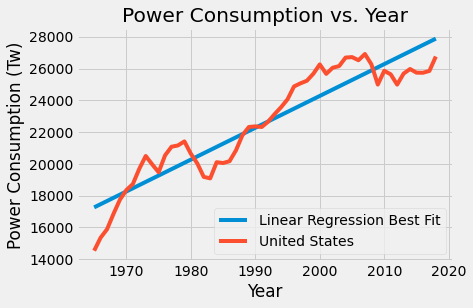

In [11]:
# 3.1.b
# Use a linear least-squares regression to find a function for the energy 
# consumption as a function of year energy consumed =  𝑓(𝑡)=𝐴𝑡+𝐵

xi = freedom_energy['Year'].values
yi = freedom_energy['Primary Energy Consumption (terawatt-hours)'].values

x_mean = np.mean(xi)
y_mean = np.mean(yi)

a_1 = np.sum(yi* (xi-x_mean))/np.sum(xi*(xi-x_mean))
a_0 = y_mean - a_1*x_mean

reg = a_0+ a_1*xi

plt.plot(xi,reg, label='Linear Regression Best Fit')
plt.plot(freedom_energy['Year'], freedom_energy['Primary Energy Consumption (terawatt-hours)'], label='United States')
plt.title('Power Consumption vs. Year')
plt.ylabel('Power Consumption (Tw)')
plt.xlabel('Year');
plt.legend(loc='best');

print('Best fit: y = {:2.2f} + {:2.2f}x' .format(a_0,a_1))

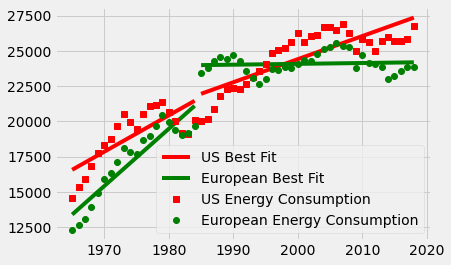

In [12]:
# 3.1.c
# At what year would you change split the data and use two 
# lines like you did in the land temperature anomoly? Split the data and perform two linear fits.
splityr = 1985

usax = freedom_energy['Year'].values
usay = freedom_energy['Primary Energy Consumption (terawatt-hours)'].values

europex = euro_energy['Year'].values
europey = euro_energy['Primary Energy Consumption (terawatt-hours)'].values

pp_usa_01 = np.polyfit(usax[usax< splityr], usay[usax<splityr],1)
pp_europe_01 = np.polyfit(europex[europex<splityr], europey[europex<splityr],1)

pp_usa_02 = np.polyfit(usax[usax >= splityr], usay[usax>=splityr],1)
pp_europe_02 = np.polyfit(europex[europex>=splityr], europey[europex>=splityr],1)

plt.plot(usax[usax<splityr], np.polyval(pp_usa_01, usax[usax<splityr]), 'r-', label='US Best Fit')
plt.plot(europex[europex<splityr], np.polyval(pp_europe_01, europex[europex<splityr]), 'g-')

plt.plot(usax[usax>=splityr], np.polyval(pp_usa_02, usax[usax>=splityr]), 'r-')
plt.plot(europex[europex>=splityr], np.polyval(pp_europe_02, europex[europex>=splityr]), 'g-', label='European Best Fit')

plt.plot(freedom_energy['Year'], freedom_energy['Primary Energy Consumption (terawatt-hours)'], 'rs', label='US Energy Consumption')
plt.plot(euro_energy['Year'], euro_energy['Primary Energy Consumption (terawatt-hours)'], 'go', label='European Energy Consumption')

plt.legend(loc='best')

I would split the data at 1985.

In [13]:
# 3.1.d
# What is your prediction for US energy use in 2025? How about European energy use in 2025

us_25 = np.polyval(pp_usa_02, 2025)
eu_25 = np.polyval(pp_europe_02, 2025)

print('I predict US energy use in 2025 will be {:1.2e} Tw' .format(us_25))
print('I predict European energy use in 2025 will be {:1.2e} Tw' .format(eu_25))

I predict US energy use in 2025 will be 2.85e+04 Tw
I predict European energy use in 2025 will be 2.42e+04 Tw


2. You plotted Gordon Moore's empirical prediction that the rate of semiconductors on a computer chip would double every two years in [02_Seeing_Stats](./02_Seeing_Stats). This prediction was known as Moore's law. Gordon Moore had originally only expected this empirical relation to hold from 1965 - 1975 [[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)], but semiconductor manufacuturers were able to keep up with Moore's law until 2015. 

Use a linear regression to find our own historical Moore's Law.    

Use your code from [02_Seeing_Stats](./02_Seeing_Stats) to plot the semilog y-axis scatter plot 
(i.e. `plt.semilogy`) for the "Date of Introduction" vs "MOS transistor count". 
Color the data according to the "Designer".

Create a linear regression for the data in the form of 

$log(transistor~count)= f(date) = A\cdot date+B$

rearranging

$transistor~count= e^{f(date)} = e^B e^{A\cdot date}$

You can perform a least-squares linear regression using the following assignments

$x_i=$ `dataframe['Date of Introduction'].values`

and

$y_i=$ as `np.log(dataframe['MOS transistor count'].values)`

a. Plot your function on the semilog y-axis scatter plot

b. What are the values of constants $A$ and $B$ for our Moore's law fit? How does this compare to Gordon Moore's prediction that MOS transistor count doubles every two years?

A= 0.34
B= -654.71
Between 2008 and 2010, transistors increased by 1.96 times. Moore is accurate.


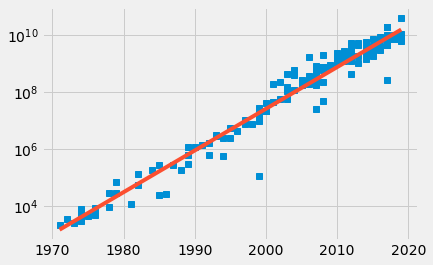

In [14]:
xi=transistor['Date of Introduction'].values
TC=transistor['MOS transistor count'].values

fit_semiconductor = np.polyfit(xi, np.log(TC), 1)

plt.semilogy(xi, TC, 's')
plt.semilogy(xi, np.exp(np.polyval(fit_semiconductor, xi)))

print('A= {:1.2f}' .format(fit_semiconductor[0]))
print('B= {:1.2f}' .format(fit_semiconductor[1]))

cop_yer = 2010
multiplier= (np.exp(np.polyval(fit_semiconductor, cop_yer))/np.exp(np.polyval(fit_semiconductor, cop_yer-2)))

print('Between {:4.0f} and {:4.0f}, transistors increased by {:1.2f} times. Moore is accurate.' .format(cop_yer-2, cop_yer, multiplier))

## Problems [Part 4](04_Stats_and_Montecarlo.md)

__1.__ [Buffon's needle problem](https://en.wikipedia.org/wiki/Buffon) is
another way to estimate the value of $\pi$ with random numbers. The goal
in this Monte Carlo estimate of $\pi$ is to create a ratio that is close
to [3.1415926...](http://www.math.com/tables/constants/pi.htm) _similar
to the example with darts points lying inside/outside a unit circle
inside a unit square._ 

![Buffon's needle for parallel
lines](https://upload.wikimedia.org/wikipedia/commons/f/f6/Buffon_needle.gif)

In this Monte Carlo estimation, you only need to know two values:
- the distance from line 0, $x = [0,~1]$
- the orientation of the needle, $\theta = [0,~2\pi]$

The y-location does not affect the outcome of crosses line 0 or not
crossing line 0. 

__a.__ Generate 100 random `x` and `theta` values _remember_ $\theta =
[0,~2\pi]$

__b.__ Calculate the x locations of the 100 needle ends e.g. $x_{end} = x
\pm \cos\theta$ _since length is unit 1. 

__c.__ Use 
[`np.logical_and`](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html)
to find the number of needles that have minimum $x_{end~min}<0$ and
maximum $x_{end~max}>0$. The ratio
$\frac{x_{end~min}<0~and~x_{end~max}>0}{number~of~needles} =
\frac{2}{\pi}$ _for large values of $number~of~needles$_.

In [ ]:
from numpy.random import default_rng
rng=default_rng(42)

# 4.1.a
N = 100000000

x = rng.random(N)
theta = rng.random(N)*2*np.pi

# 4.1.b

x1 = x + np.cos(theta)
x2 = x - np.cos(theta)

# 4.1.c
xends= np.vstack([x1,x2])
np.sum(np.logical_and(np.max(xends, axis=0)>0, np.min(xends,axis=0)<0))/N

In [ ]:
2/np.pi

__2.__ Build a random walk data set with steps between $dx = dy =
-1/2~to~1/2~m$. If 100 particles take 10 steps, calculate the number of
particles that move further than 0.5 m. 

_Bonus: Can you do the work without any `for`-loops? Change the size of
`dx` and `dy` to account for multiple particles._

In [ ]:
rng = default_rng()
N_steps = 10


N_part = 100

r_final = np.zeros((N_part,2))

count =0 
for i in range(0, N_part):
    dx = rng.random(N_steps) - 0.5
    dy = rng.random(N_steps) - 0.5
    
    r = np.zeros((N_steps, 2))
    
    r[:, 0] = np.cumsum(dx) # final rx position
    r[:, 1] = np.cumsum(dy) # final ry position
    
    if np.sqrt(r[-1,0]**2 + r[-1,1]**2) >= 0.5:
        count= count + 1 
    
print('{:1.0f} move more than 0.5m' .format(count))

__3.__ 100 steel rods are going to be used to support a 1000 kg structure. The
rods will buckle when the load in any rod exceeds the [critical buckling
load](https://en.wikipedia.org/wiki/Euler%27s_critical_load)

$P_{cr}=\frac{\pi^3 Er^4}{16L^2}$

where E=200e9 Pa, r=0.01 m +/-0.001 m, and L is the 
length of the rods supporting the structure. Create a Monte
Carlo model `montecarlo_buckle` that predicts 
the mean and standard deviation of the buckling load for 100
samples with normally distributed dimensions r and L. 

```python
mean_buckle_load,std_buckle_load=\
montecarlo_buckle(E,r_mean,r_std,L,N=100)
```

__a.__ What is the mean_buckle_load and std_buckle_load for L=5 m?

__b.__ What length, L, should the beams be so that only 2.5% will 
reach the critical buckling load?

In [ ]:
def montecarlo_buckle(E,r_mean,r_std,L,N=100):
    '''Generate N rods of length L with radii of r=r_mean+/-r_std
    then calculate the mean and std of the buckling loads in for the
    rod population holding a 1000-kg structure
    Arguments
    ---------
    E: Young's modulus [note: keep units consistent]
    r_mean: mean radius of the N rods holding the structure
    r_std: standard deviation of the N rods holding the structure
    L: length of the rods (or the height of the structure)
    N: number of rods holding the structure, default is N=100 rods
    Returns
    -------
    mean_buckle_load: mean buckling load of N rods under 1000*9.81/N-Newton load
    std_buckle_load: std dev buckling load of N rods under 1000*9.81/N-Newton load
    '''
    rand = rng.random(N)
    
    r_meanMax = r_mean + r_std
    r_meanMin = r_mean - r_std
    
    rrand = r_meanMin+(r_meanMax-r_meanMin)* rand
    Lrand = L * rand
    
    p_cr = (np.pi**3*E*rrand**4)/(16*Lrand**2)
    
    mean_buckle_load = np.mean(p_cr)
    std_buckle_load = np.std(p_cr)
    
    return mean_buckle_load, std_buckle_load, p_cr

In [ ]:
E = 200e9
r_mean = 0.01
L = .9
r_std = 0.001

van = montecarlo_buckle(E, r_mean, r_std, L)

print('Mean buckle load: {:3.1f} kPa' .format(van[0]*10**-3))
print('STD buckle load: {:3.1f} kPa' .format(van[1]*10**-3))

force = 1000*9.81
count=0
var=van[2]

for i in range(N):
    if force>=var[i]:
        count=count+1
        
percent = count/N*100

print('{:1.2f}% buckle at {:1.0}m' .format(percnet, L))